In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import PDSVRP_instance
from matplotlib.patches import Circle

In [3]:
# Step 1: Read the file
file_path = 'solver_solution_file_test.txt'
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists for x and y values
x_values = []
y_values = []

# Categorize each line
for line in data:
    if line.startswith('x'):
        x_values.append(line.strip())
    elif line.startswith('y'):
        y_values.append(line.strip())

In [4]:
# Step 3: Find the path that forms a closed circuit starting and ending at node 0
def find_closed_circuit(graph, start_node):
    circuit = []
    current_node = start_node
    visited_edges = set()
    
    while True:
        if current_node not in graph or not graph[current_node]:
            break
        
        next_node = graph[current_node].pop(0)
        visited_edges.add((current_node, next_node))
        
        circuit.append((current_node, next_node))
        current_node = next_node
        
        if current_node == start_node and len(visited_edges) == len(edges):
            break
    
    return circuit

In [19]:
# Step 1: Parse the data to extract edges
edges = []
for line in x_values:
    if line.startswith('x[') and line.endswith(': 1.0'):
        parts = line.split('[')[1].split(']')[0].split(',')
        i = int(parts[0])
        j = int(parts[1])
        edges.append((i, j))
        
# Step 2: Build a graph using a dictionary
graph = {}
for i, j in edges:
    if i not in graph:
        graph[i] = []
    graph[i].append(j)

closed_circuit = find_closed_circuit(graph, 0)

graphs = []
k = 0

graphs = []
graphs.append([])
k = 0
for i, j in closed_circuit:
    if j == 0:
        graphs[k].append((i,j))   
        graphs.append([])   
        k += 1  
    else: 
        graphs[k].append((i,j))   
    
graphs.pop()
print(graphs)
'''
while len(closed_circuit) != 0:
    graphs.append([])
    for i, j in closed_circuit:
        if j == 0:
            graphs[k].append((i, j))
            print(closed_circuit)
            k += 1

        if j == 0:
            print("break")
            break
    print("new graph added")
    k += 1
    
print(graphs)     
'''

print(closed_circuit)
# Verify if the closed circuit starts and ends at node 0 and uses all edges
start_node = 0
end_node = closed_circuit[-1][1] if closed_circuit else None

if start_node == end_node and len(closed_circuit) == len(edges):
    print("\nThe path forms a closed circuit starting and ending at node 0.")
else:
    print("\nThe path does not form a valid closed circuit.")

[[(0, 17), (17, 10), (10, 14), (14, 2), (2, 25), (25, 4), (4, 5), (5, 23), (23, 22), (22, 19), (19, 6), (6, 1), (1, 21), (21, 30), (30, 29), (29, 0)], [(0, 27), (27, 0)]]
[(0, 17), (17, 10), (10, 14), (14, 2), (2, 25), (25, 4), (4, 5), (5, 23), (23, 22), (22, 19), (19, 6), (6, 1), (1, 21), (21, 30), (30, 29), (29, 0), (0, 27), (27, 0)]

The path forms a closed circuit starting and ending at node 0.


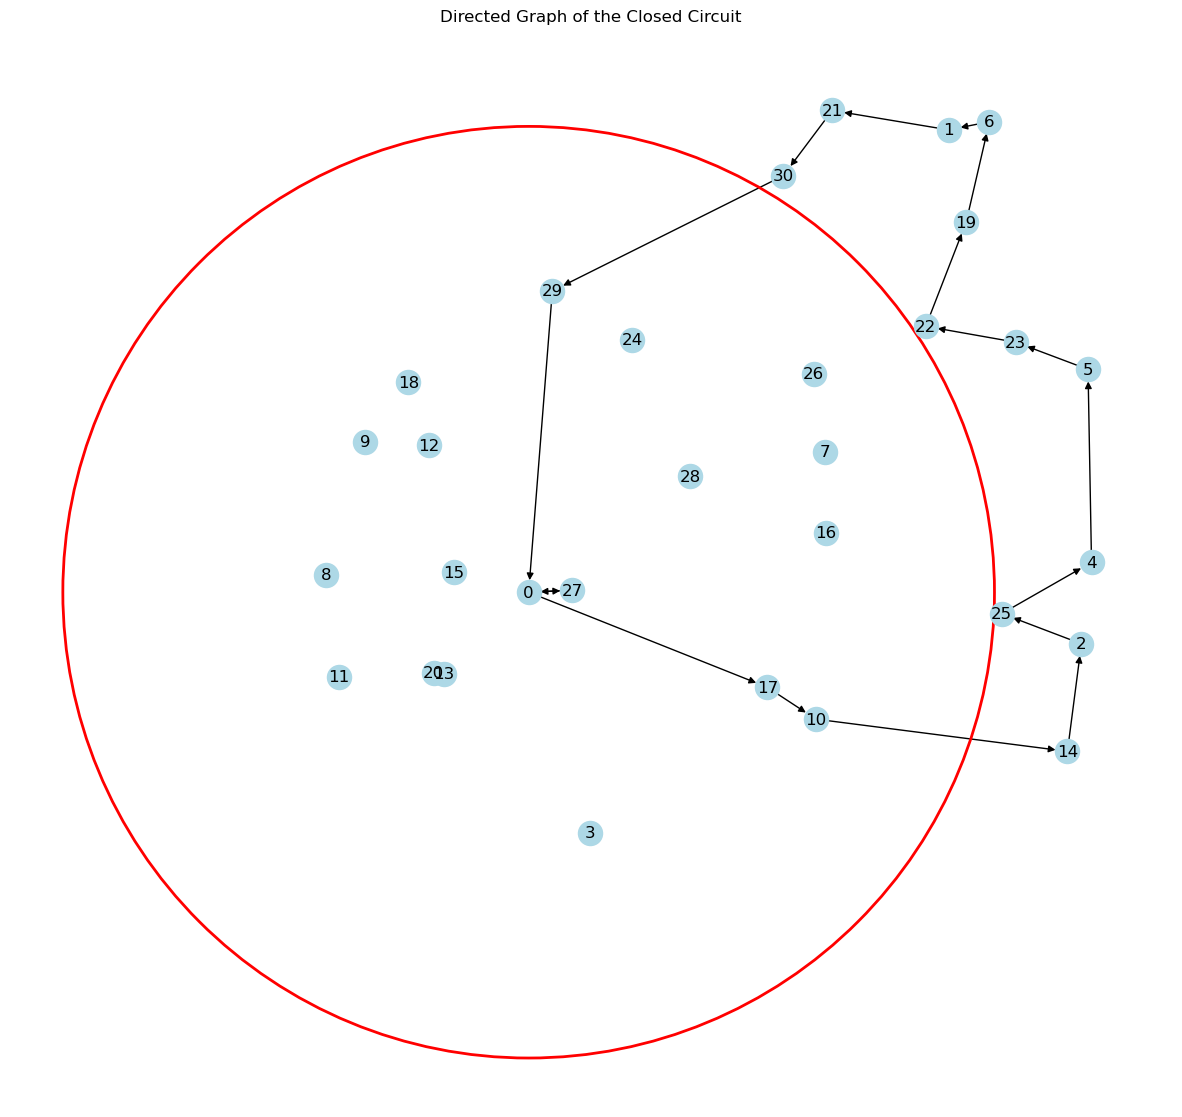

In [96]:
instance = PDSVRP_instance.PDSVRPInstance("instances/30-r-2-r.txt")

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their coordinates
for i, coord in enumerate(instance.coordinates):
    G.add_node(i, pos=coord)

# Add edges from the closed circuit
G.add_edges_from(closed_circuit)

# Get positions of the nodes from the coordinates
pos = {i: coord for i, coord in enumerate(instance.coordinates)}

#
#drone_eligible_costumers = [i for i in range(1,instance.N) if (instance.w[i] <=  instance.Q_d and ((instance.t_d[i] * 2) <= instance.d_end))]

# Draw the graph
plt.figure(figsize=(15, 15))
ax = plt.gca()  # Get the current axes
ax.set_aspect('equal')

nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', arrowsize=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={})

# Draw a circle centered at the node with index 0
center_pos = instance.coordinates[0]
circle = Circle(center_pos, radius=(instance.d_end/2)*instance.d_speed, edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(circle)

# Set the limits to center the plot around (0,0)
max_coordinate = max(max(x, y) for x, y in instance.coordinates) + 1  # Adding 1 for padding
min_coordinate = min(min(x, y) for x, y in instance.coordinates) - 1  # Subtracting 1 for padding
ax.set_xlim(min_coordinate, max_coordinate)
ax.set_ylim(min_coordinate, max_coordinate)

plt.autoscale(enable=True)
plt.title("Directed Graph of the Closed Circuit")
plt.show()

In [25]:

instance = PDSVRP_instance.PDSVRPInstance("instances/30-r-1-c.txt")

print(instance.coordinates)

[(10.0, 10.0), (13.58, 15.07), (8.17, 6.01), (9.93, 10.71), (13.6, 1.17), (12.72, 6.78), (13.87, 16.5), (5.48, 4.47), (1.42, 18.05), (5.4, 11.05), (7.82, 5.53), (17.08, 8.0), (9.34, 9.32), (10.82, 8.72), (4.77, 12.04), (9.32, 11.93), (10.11, 18.82), (19.7, 7.27), (11.16, 17.47), (18.54, 18.43), (11.36, 6.73), (1.98, 3.0), (14.33, 14.54), (16.09, 2.46), (6.08, 5.32), (14.16, 3.96), (15.89, 19.02), (11.11, 8.57), (17.28, 8.8), (9.35, 1.47), (12.32, 7.87)]


Path: [(0, 10), (10, 7), (7, 2), (2, 0)]


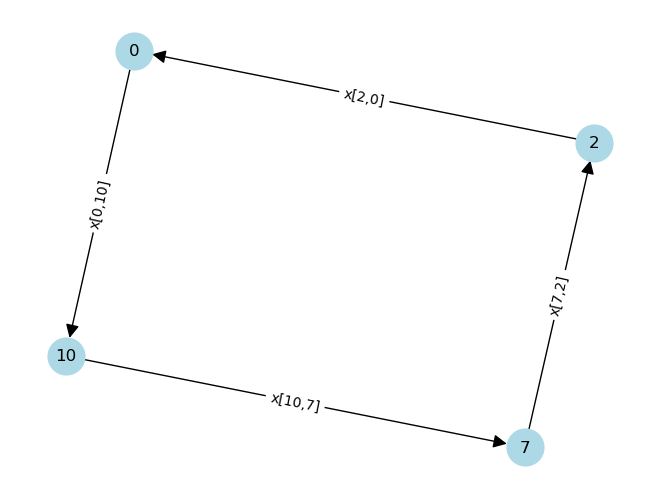

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample text from the file
text = """x[0,10]: 1.0
x[2,0]: 1.0
x[7,2]: 1.0
x[10,7]: 1.0"""

# Parse the text to extract the edges
data_dict = {}
for line in data:
    key, value = line.strip().split(': ')
    row_col = key.split('[')[1].split(']')[0].split(',')
    row, col = int(row_col[0]), int(row_col[1])
    value = float(value)
    if value != 0:
        data_dict[(row, col)] = value

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Find the path from x[0,0] to x[0,0]
path = []
current_node = 0  # start from node 0
while True:
    neighbors = list(G.neighbors(current_node))
    if not neighbors:
        break
    next_node = neighbors[0]
    path.append((current_node, next_node))
    current_node = next_node
    if current_node == 0:  # back to the starting node
        break

# Print the path
print("Path:", path)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrowsize=20)
edge_labels = {edge: f"x[{edge[0]},{edge[1]}]" for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()
